<a href="https://colab.research.google.com/github/ronnyboi/Data_Analytics/blob/main/Program%209%3A%20Auto%20Regression/Ron_Program9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto Regression

Use a dataset and implement Autoregression.
Predict and visualize the results.
Print the MSE/RMSE/SSE.

This datset is taken from https://www.kaggle.com/dgawlik/nyse?select=prices.csv

**New York Stock Prices**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd

In [ ]:
import pandas as pd
pd.set_option('max_columns', None)
import numpy as np
df = pd.read_csv("prices.csv", parse_dates=['date'])
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

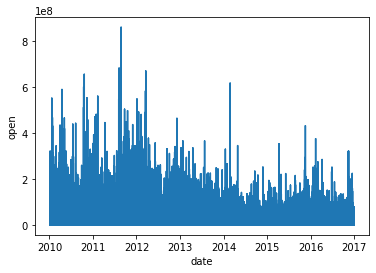

In [ ]:
plt.ylabel('open')
plt.xlabel('date')
plt.plot(df['date'],df['volume'])
plt.show()

In [ ]:
X = df['volume'].values
train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
model = AR(train)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 2.07511069e+06 -1.76350502e-02  2.62905466e-02 -1.42652574e-02
  3.03399184e-02 -1.02249569e-02 -2.41574624e-02 -2.39206614e-02
 -3.54378031e-03 -2.03585763e-02  6.35546517e-03  2.05307614e-03
 -9.76603773e-03  4.44024118e-02  2.92243793e-02 -1.58936029e-02
 -7.54747429e-03  6.41158782e-02 -1.59137160e-02  8.97195538e-03
 -7.67535671e-03  3.32212595e-02 -1.51257425e-02  1.38664266e-04
  4.29281396e-02  1.47933466e-02  1.51240727e-02  2.88738069e-02
 -2.18499854e-04 -2.40402239e-04 -7.73110920e-03 -1.82071473e-02
  2.45459093e-02 -1.05105074e-02 -2.93249726e-02 -1.67710971e-02
 -8.25905714e-03 -1.31149540e-02  4.20686160e-05  2.77382388e-02
 -2.84198382e-02  1.07556438e-02  1.48991273e-03  5.80753909e-03
 -1.39079147e-02 -5.22097451e-03 -9.83131184e-03  9.77890471e-04
  1.58852573e-01  2.66794526e-02  2.05918848e-02  1.36804301e-02
 -2.30332376e-02 -1.47108045e-02  7.47781220e-03  6.77248922e-02
  4.84650809e-02  3.95288693e-02  3.48062638e-03  2.30102767e-02
  6.1860090

In [ ]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


predicted=4270945.369598, expected=6431600.000000
predicted=2349572.059991, expected=1887100.000000
predicted=3839894.240776, expected=973800.000000
predicted=4281979.215832, expected=1938100.000000
predicted=3375770.973848, expected=1701200.000000
predicted=3843995.820347, expected=1380900.000000
predicted=3597235.251320, expected=705100.000000
Test RMSE: 2262301.296


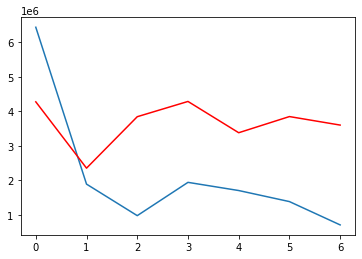

In [ ]:
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()